<a href="https://colab.research.google.com/github/AlejandroHerrera15/PROYECTO_IA/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración de datos

## ADAMS SoSe23
Predicting prices of AirBnB listings in the city of London: [Kaggle link](https://www.kaggle.com/competitions/adams-sose23)


In [ ]:
api_token = {"username":"alejandroherrerar",
             "key":"a266538c9ed8b4d58aa6d5b3bcf32743"}

In [ ]:
!rm -rf /root/.kaggle.

In [ ]:
!mkdir /root/.kaggle

In [ ]:
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c adams-sose23

 99% 223M/225M [00:07<00:00, 33.8MB/s]
100% 225M/225M [00:07<00:00, 30.2MB/s]


In [ ]:
!unzip adams-sose23

Archive:  adams-sose23.zip
  inflating: reviews.csv             
  inflating: test.csv                
  inflating: train.csv               


# Cargar base

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math


In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,listing_id
0,Attic Room in historic Greenwich,The room does not have a door but its own disc...,Double room available in historic royal Greenw...,The room does not have a door but its own disc...,business,NaN,Parking is restricted in London. Visitors park...,no shoes on carpets no food in attic room no o...,https://a0.muscache.com/im/pictures/20045164/7...,2167992,...,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2.37,9Q1RD6H7IO
1,Lovely Garden Studio Private Access,"Garden studio with private entrance, 5 minutes...","Beautiful studio with a king size bed, a sofa ...","Garden studio with private entrance, 5 minutes...",none,Crouch End is a very hip and friendly neighbou...,Walk across the street to the W3 bus stop and ...,We'd love it if you would remove your shoes at...,https://a0.muscache.com/im/pictures/8d1ddcdc-f...,16148175,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2.97,6XDPZPGLSR
2,Comfi apartment 2 close to wimbledon tennis court,NaN,NaN,NaN,none,NaN,NaN,1- No party or event allowed. 2-No smoking ins...,https://a0.muscache.com/im/pictures/e7e4a740-d...,272000199,...,84.0,9.0,9.0,10.0,10.0,9.0,8.0,strict_14_with_grace_period,1.73,SND9OPN6IY
3,Luxury room in the heart of London - SW4,Luxury first floor Victorian split level maiso...,"Your room will be fully furnished, and it will...",Luxury first floor Victorian split level maiso...,none,"Gail coffee shop, just round the corner as wel...",Happy to advise on things to do in London and ...,- Check-in after 18:30pm and no later than 20:...,https://a0.muscache.com/im/pictures/7c2b2fcc-e...,3361233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,SE3B7BXN9G
4,Excellent city Apartment with Private Patio,"NEW luxury apartment, with private outside pat...","A modern, well-equipped, cosy apartment close ...","NEW luxury apartment, with private outside pat...",none,NaN,NaN,"I am very happy for your visit, but please car...",https://a0.muscache.com/im/pictures/ca1494da-f...,94317022,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2.32,E0C82VK0VF


In [ ]:
df_train.shape

(55284, 42)

In [ ]:
df_train.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'picture_url',
       'host_id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'reviews_per_month',
       'listing_id'],
      dtype='object')

# Descripción de variables

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55284 entries, 0 to 55283
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         55270 non-null  object 
 1   summary                      52330 non-null  object 
 2   space                        38403 non-null  object 
 3   description                  53558 non-null  object 
 4   experiences_offered          55284 non-null  object 
 5   neighborhood_overview        35778 non-null  object 
 6   transit                      35477 non-null  object 
 7   house_rules                  31906 non-null  object 
 8   picture_url                  55284 non-null  object 
 9   host_id                      55284 non-null  int64  
 10  host_since                   55173 non-null  object 
 11  host_response_time           37482 non-null  object 
 12  host_response_rate           37482 non-null  object 
 13  host_is_superhos

In [ ]:
tabla = df_train.copy()
tabla.iloc[0:5,20:30]

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities
0,51.47457,-0.01062,Townhouse,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Wifi,""Paid parking off premises"",Heating,Wash..."
1,51.58329,-0.12416,Guesthouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Free parking on premises"",Breakfast,..."
2,51.41634,-0.18567,Apartment,Entire home/apt,5,1.0,1.0,2.0,Real Bed,"{Wifi,Kitchen,""Paid parking off premises"",Heat..."
3,51.45622,-0.14137,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detecto..."
4,51.48114,-0.11219,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",H..."


Al ver la tabla incial se pueden ver que algunas variables no se tendran en cuenta porque son descripciones de las residencias estas son el name, summary, space y description

In [ ]:
tabla=df_train.copy()
tabla.drop(['name', 'summary', 'space', 'amenities', 'description','neighborhood_overview','transit','house_rules','picture_url','host_id','host_since'],axis=1,inplace=True)

In [ ]:
len(tabla.columns)

31

# Variable objetivo

<ipython-input-9-6ec477f04b98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tabla['price'])


<Axes: xlabel='price', ylabel='Density'>

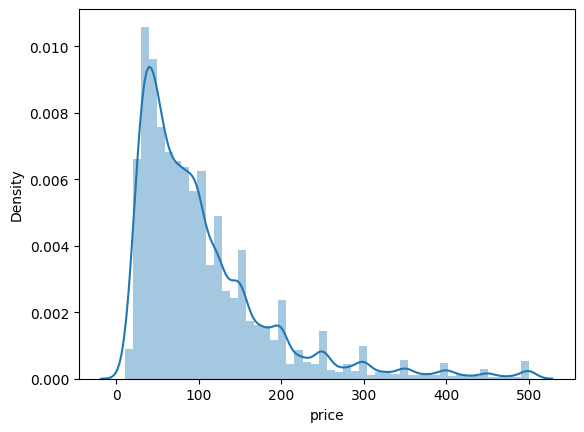

In [ ]:
sns.distplot(tabla['price'])

In [ ]:
print('Skewness de la variable objetivo', tabla['price'].skew())

Skewness de la variable objetivo 2.0247516920492235


**Observación:**
- La variable objetivo presenta un poco de asimetria positiva.
- Se puede arreglar esta asimetria aplicando una transformación logaritmica.

In [ ]:
#transformación logaritmica de la variable objetivo
tabla['price']=np.log1p(tabla['price'])

<ipython-input-12-6ec477f04b98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tabla['price'])


<Axes: xlabel='price', ylabel='Density'>

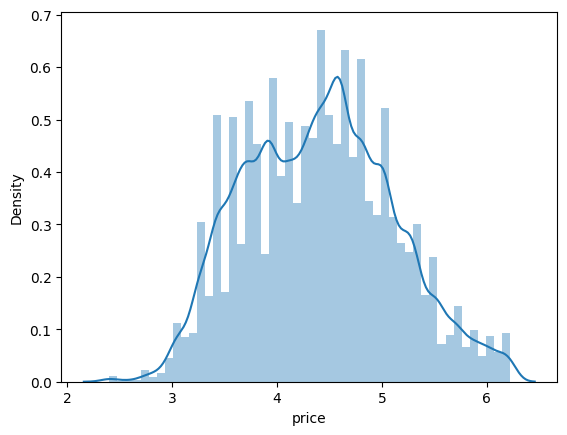

In [ ]:
sns.distplot(tabla['price'])

In [ ]:
print('Skewness de la variable objetivo', tabla['price'].skew())

Skewness de la variable objetivo 0.1742063095440913


Se puede observar que los valores más recurrentes para el precio van de los 50 a los 100 dólares

# Variables numéricas

In [ ]:
tabla._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
host_total_listings_count,55173.0,20.704475,117.029690,0.00000,1.000000,2.00000,5.00000,1321.00000
latitude,55284.0,51.509971,0.046741,51.29479,51.485300,51.51433,51.53796,51.68169
longitude,55284.0,-0.126962,0.093517,-0.49668,-0.187632,-0.12451,-0.06882,0.28539
accommodates,55284.0,3.131756,1.930209,1.00000,2.000000,2.00000,4.00000,16.00000
bathrooms,55214.0,1.283850,0.566556,0.00000,1.000000,1.00000,1.50000,11.00000
bedrooms,55222.0,1.373873,0.859448,0.00000,1.000000,1.00000,2.00000,19.00000
beds,55022.0,1.710661,1.224301,0.00000,1.000000,1.00000,2.00000,21.00000
price,55284.0,104.308751,83.740407,10.00000,45.000000,80.00000,130.00000,500.00000
guests_included,55284.0,1.574832,1.263427,1.00000,1.000000,1.00000,2.00000,46.00000
review_scores_rating,41869.0,92.533044,10.030620,20.00000,90.000000,96.00000,100.00000,100.00000


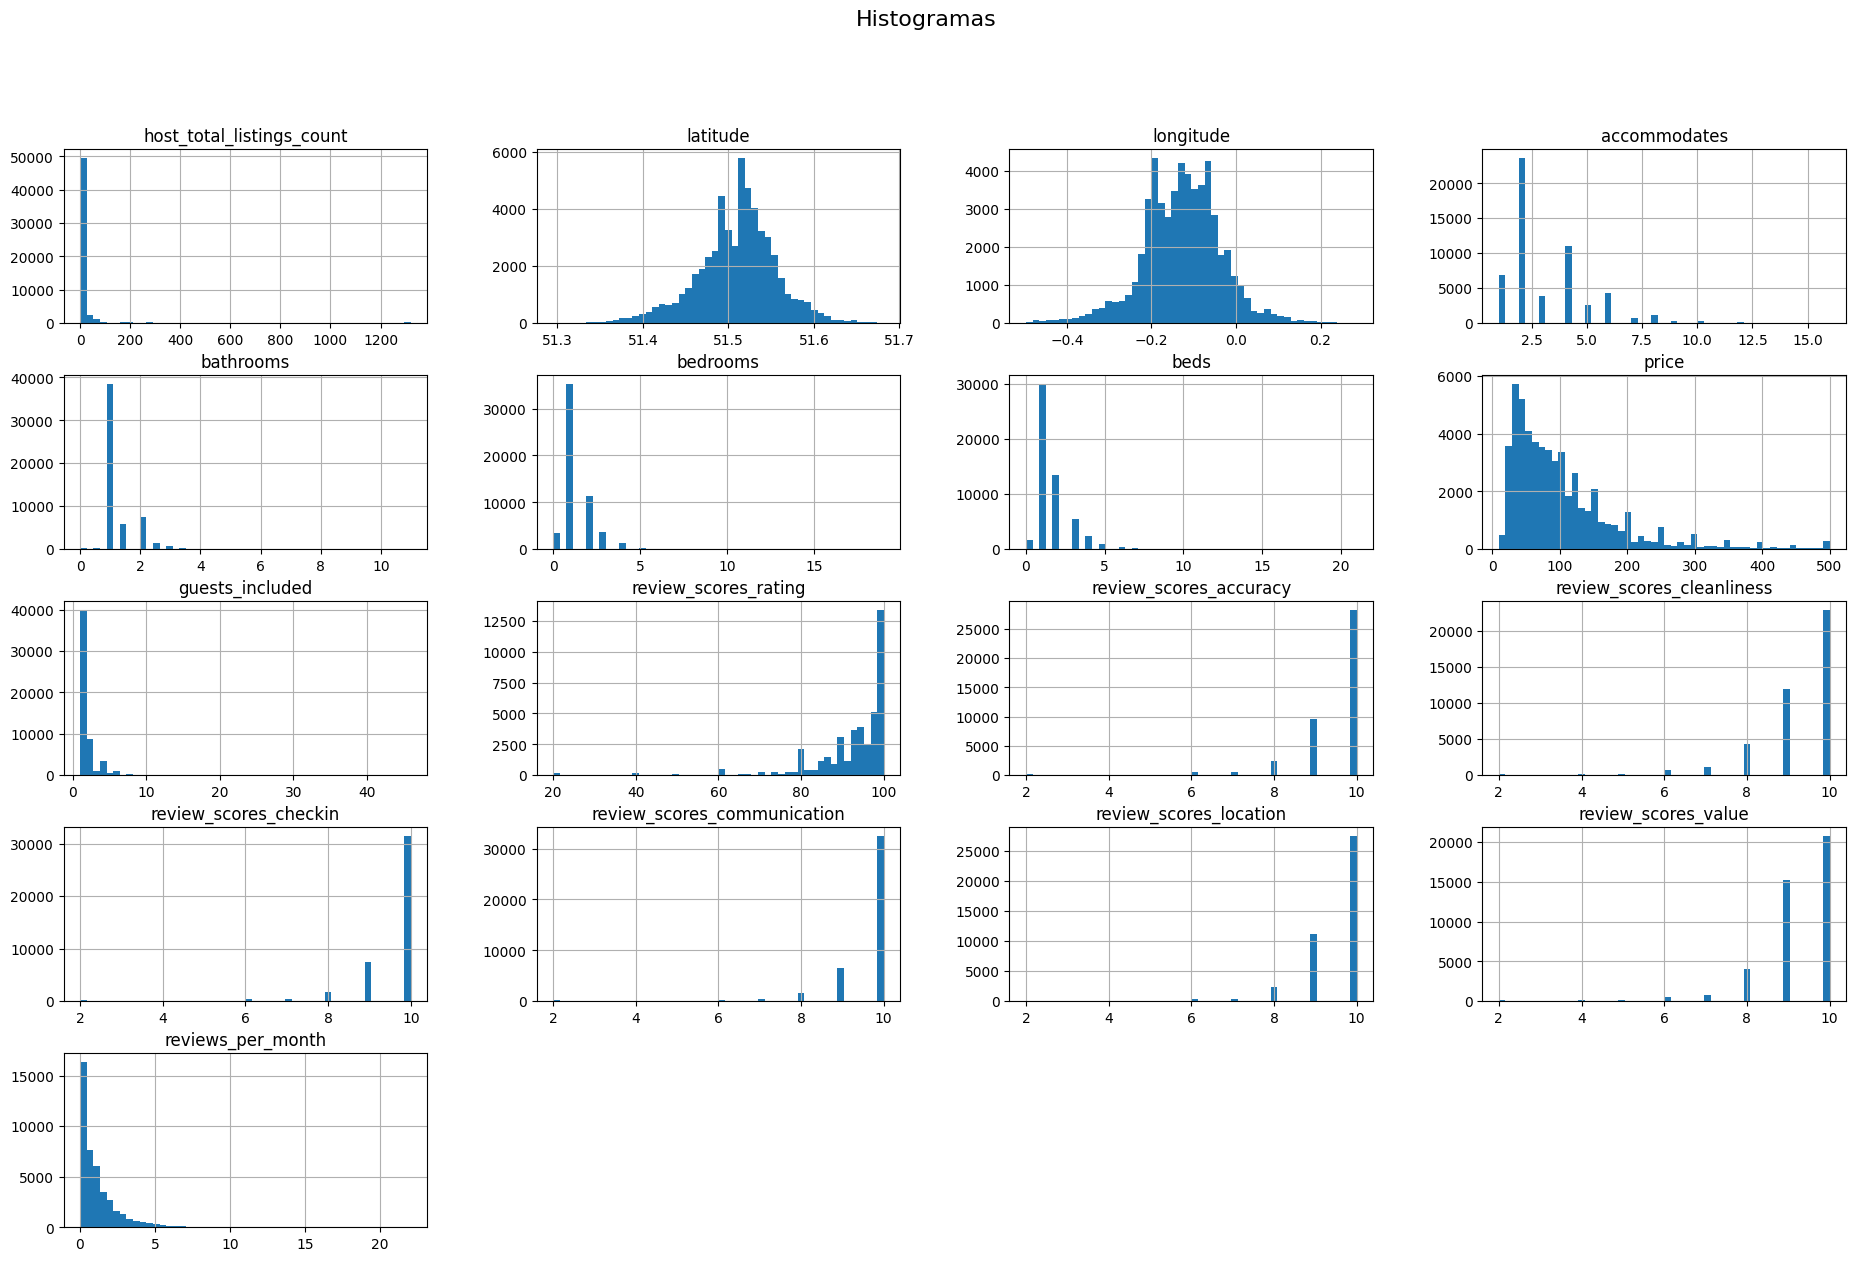

In [ ]:
#Gráficos de los histogramas de las distribuciones de las variables
tabla.hist(bins=50, figsize=(23,14))
plt.suptitle('Histogramas', fontsize=16)
plt.show()

**Observaciones:**
- Tanto la cantidad de reviews por mes como los invitados que incluye indican una asimetria hacia la izquierda, indicando que la mayor parte de los valores son bajos, sin embargo exiten valores altos que provocan esta asimetría.
- Las puntuaciones de las reviews por lo general son positivas, siendo el puntaje 10 el que tiene las mayores cantidades de reviews para los datos.
- La cantidad de habitaciones como la cantidad de camas tienen cantidades similares, siendo el valor de (1) el que mayor valores tiene en ambas variables.

<ipython-input-33-783edf34dac5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")


<Axes: >

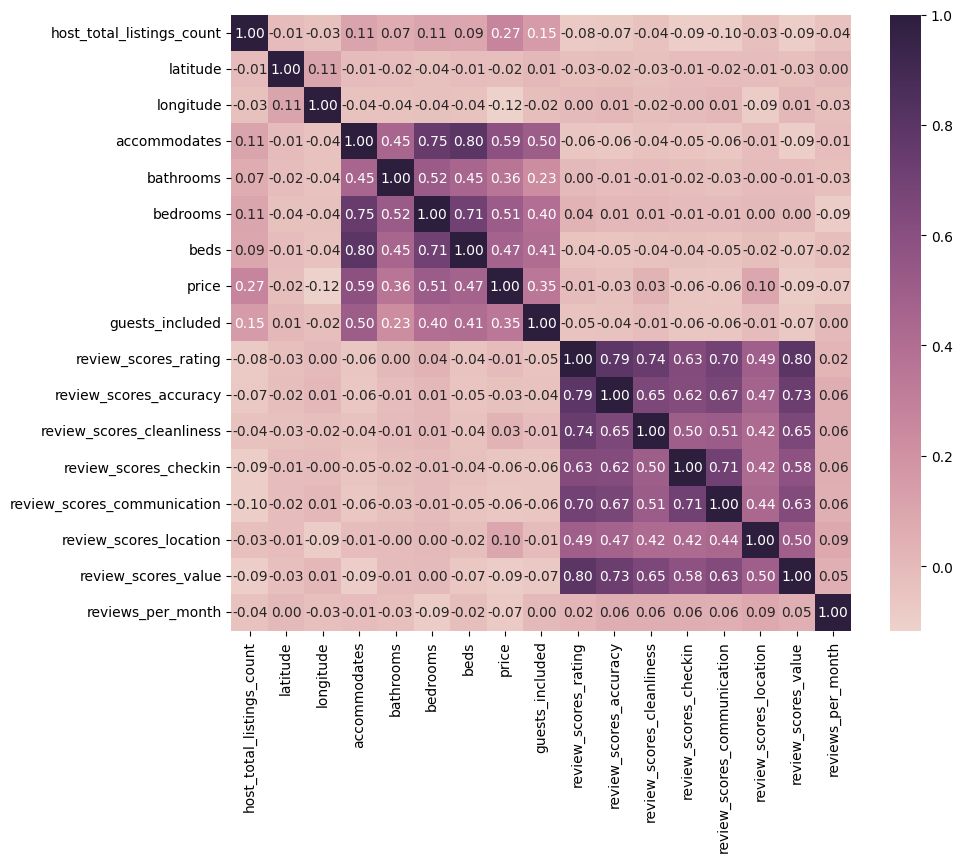

In [ ]:
# Mapa de correlaciones
from matplotlib.pyplot import figure
columnasnumericas=tabla.select_dtypes(include=['int64', 'float64'])
figure(figsize=(10,8))
sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

In [ ]:
#Correlaciones de las variables con la variable objetivo
corr_matrix = tabla.corr()
target_corr_df = pd.DataFrame(corr_matrix["price"].sort_values(ascending=False))
target_corr_df

<ipython-input-13-4c7e594097f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = tabla.corr()


,price
price,1.000000
accommodates,0.622268
bedrooms,0.488660
beds,0.467160
guests_included,0.356877
bathrooms,0.277854
host_total_listings_count,0.190067
review_scores_location,0.127735
review_scores_cleanliness,0.047939
review_scores_rating,-0.005669


**Observaciones:**
- Las variables de reviews de los clientes presentan bastante correlación entre ellas, como por ejemplo "review_scores_rating", la cual presenta los valores de correlación más altos con las demás variables de reviews, siendo en casi todos los casos mayor a 0.6
- La variable de capacidad "accommodates" se correlaciona mucho con el número de camas "beds", el número de habitaciones "bedrooms" y el precio, lo cual tiene mucho sentido, ya que mientras mayor sea la capacidad del lugar se espera un aumento en esas variables también. Al igual que el número de camas se correlaciona mucho con el número de habitaciones.

In [ ]:
tabla.drop(['review_scores_rating', 'accommodates', 'bedrooms', 'review_scores_accuracy'],axis=1,inplace=True)

<ipython-input-15-783edf34dac5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")


<Axes: >

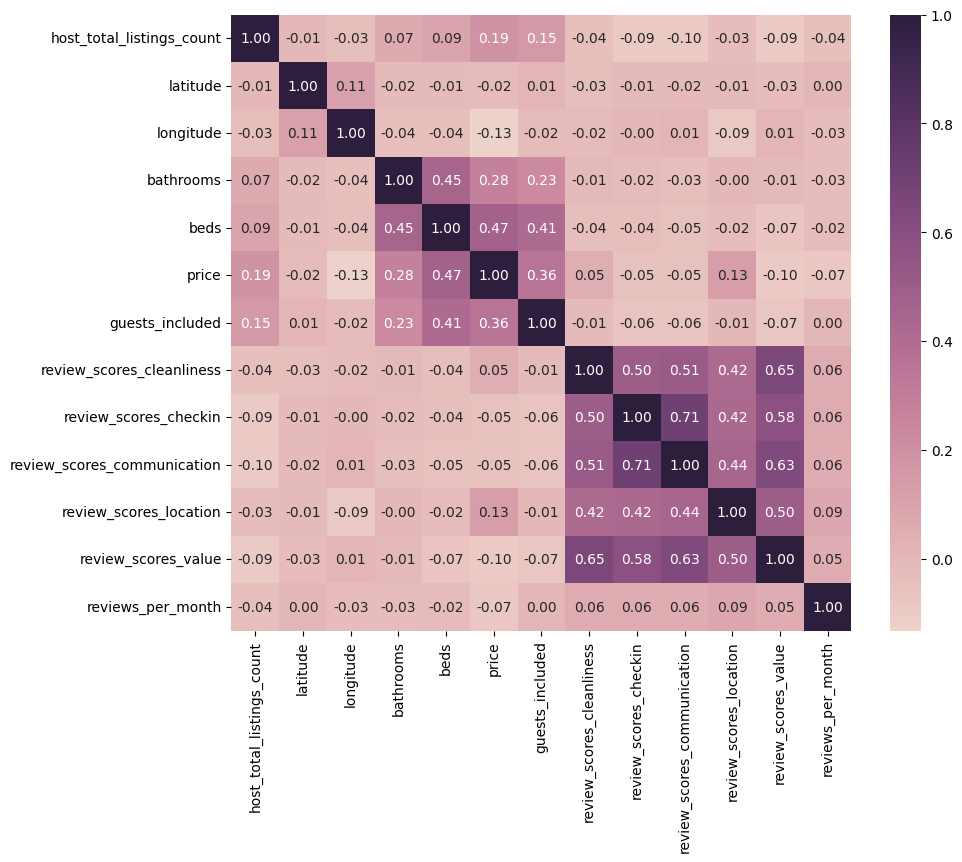

In [ ]:
# Mapa de correlaciones
from matplotlib.pyplot import figure
columnasnumericas=tabla.select_dtypes(include=['int64', 'float64'])
figure(figsize=(10,8))
sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

# Variables categóricas

In [ ]:
# seleccionar solo variable categoricas
tabla_cat = tabla.select_dtypes(include=['object']).copy()
print(tabla.select_dtypes(include=['object']).columns)

Index(['experiences_offered', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'zipcode', 'property_type',
       'room_type', 'bed_type', 'cancellation_policy', 'listing_id'],
      dtype='object')


Correlación de variables categóricas

In [ ]:
# dividir las columnas en 2 listas
cat_var1 = ('experiences_offered', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy')
cat_var2 = ('experiences_offered', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy')

In [ ]:
# crear las posibles combinaciones entre las dos tuplas
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [ ]:
# crear una variable vacia para almacenar los datos y almacenar solo el valor-p del resultado
import scipy.stats as ss
result = []
for i in cat_var_prod:
  if i[0] != i[1]:
      result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            tabla_cat[i[0]], tabla_cat[i[1]])))[1]))
result

[('experiences_offered', 'host_response_time', 1.5404877370192118e-11),
 ('experiences_offered', 'host_response_rate', 0.024701602883569266),
 ('experiences_offered', 'host_is_superhost', 1.2109655718732844e-31),
 ('experiences_offered', 'host_has_profile_pic', 0.7262523248759465),
 ('experiences_offered', 'host_identity_verified', 1.9200615653908886e-114),
 ('experiences_offered', 'neighbourhood', 3.323808600958796e-05),
 ('experiences_offered', 'neighbourhood_cleansed', 1.1811835727914798e-09),
 ('experiences_offered', 'property_type', 6.983017000689958e-13),
 ('experiences_offered', 'room_type', 6.570125924980886e-61),
 ('experiences_offered', 'bed_type', 1.1257927604236117e-26),
 ('experiences_offered', 'cancellation_policy', 6.256904268941496e-36),
 ('host_response_time', 'experiences_offered', 1.5404877370191947e-11),
 ('host_response_time', 'host_response_rate', 0.0),
 ('host_response_time', 'host_is_superhost', 4.832768637687068e-133),
 ('host_response_time', 'host_has_profile_

In [ ]:
# Filtrar las tuplas cuyo tercer valor es mayor a 0.05
resultados_filtrados = [tupla for tupla in result if tupla[2] > 0.05]

# Imprimir los resultados filtrados
for tupla in resultados_filtrados:
    print(tupla)

('experiences_offered', 'host_has_profile_pic', 0.7262523248759465)
('host_response_time', 'host_has_profile_pic', 0.06519513735833132)
('host_has_profile_pic', 'experiences_offered', 0.7262523248759465)
('host_has_profile_pic', 'host_response_time', 0.06519513735833132)
('host_has_profile_pic', 'neighbourhood', 0.5249147652569358)
('host_has_profile_pic', 'property_type', 0.28057414590348084)
('host_has_profile_pic', 'bed_type', 0.8739667231613887)
('neighbourhood', 'host_has_profile_pic', 0.524914765256935)
('neighbourhood', 'bed_type', 0.06702526850700927)
('property_type', 'host_has_profile_pic', 0.28057414590348084)
('bed_type', 'host_has_profile_pic', 0.8739667231613887)
('bed_type', 'neighbourhood', 0.06702526850700927)
('bed_type', 'cancellation_policy', 0.8928835121337191)
('cancellation_policy', 'bed_type', 0.892883512133719)


**Observaciones:**
- Las variables "host_has_profile_pic" y "bed_type" se correlacionan mucho con otras variables, por lo que se decide eliminarlas.

# Nulos

In [ ]:
#Porcentaje de datos faltantes para cada variable del dataset
total           = tabla.isnull().sum().sort_values(ascending=False)
percent         = (tabla.isnull().sum()/tabla.isnull().count()*100).sort_values(ascending=False)
missing_train  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train

,Total,Percent
host_response_rate,17802,32.200998
host_response_time,17802,32.200998
review_scores_checkin,13483,24.388612
review_scores_value,13480,24.383185
review_scores_location,13480,24.383185
review_scores_accuracy,13448,24.325302
review_scores_communication,13446,24.321684
review_scores_cleanliness,13442,24.314449
review_scores_rating,13415,24.265610
reviews_per_month,12380,22.393459


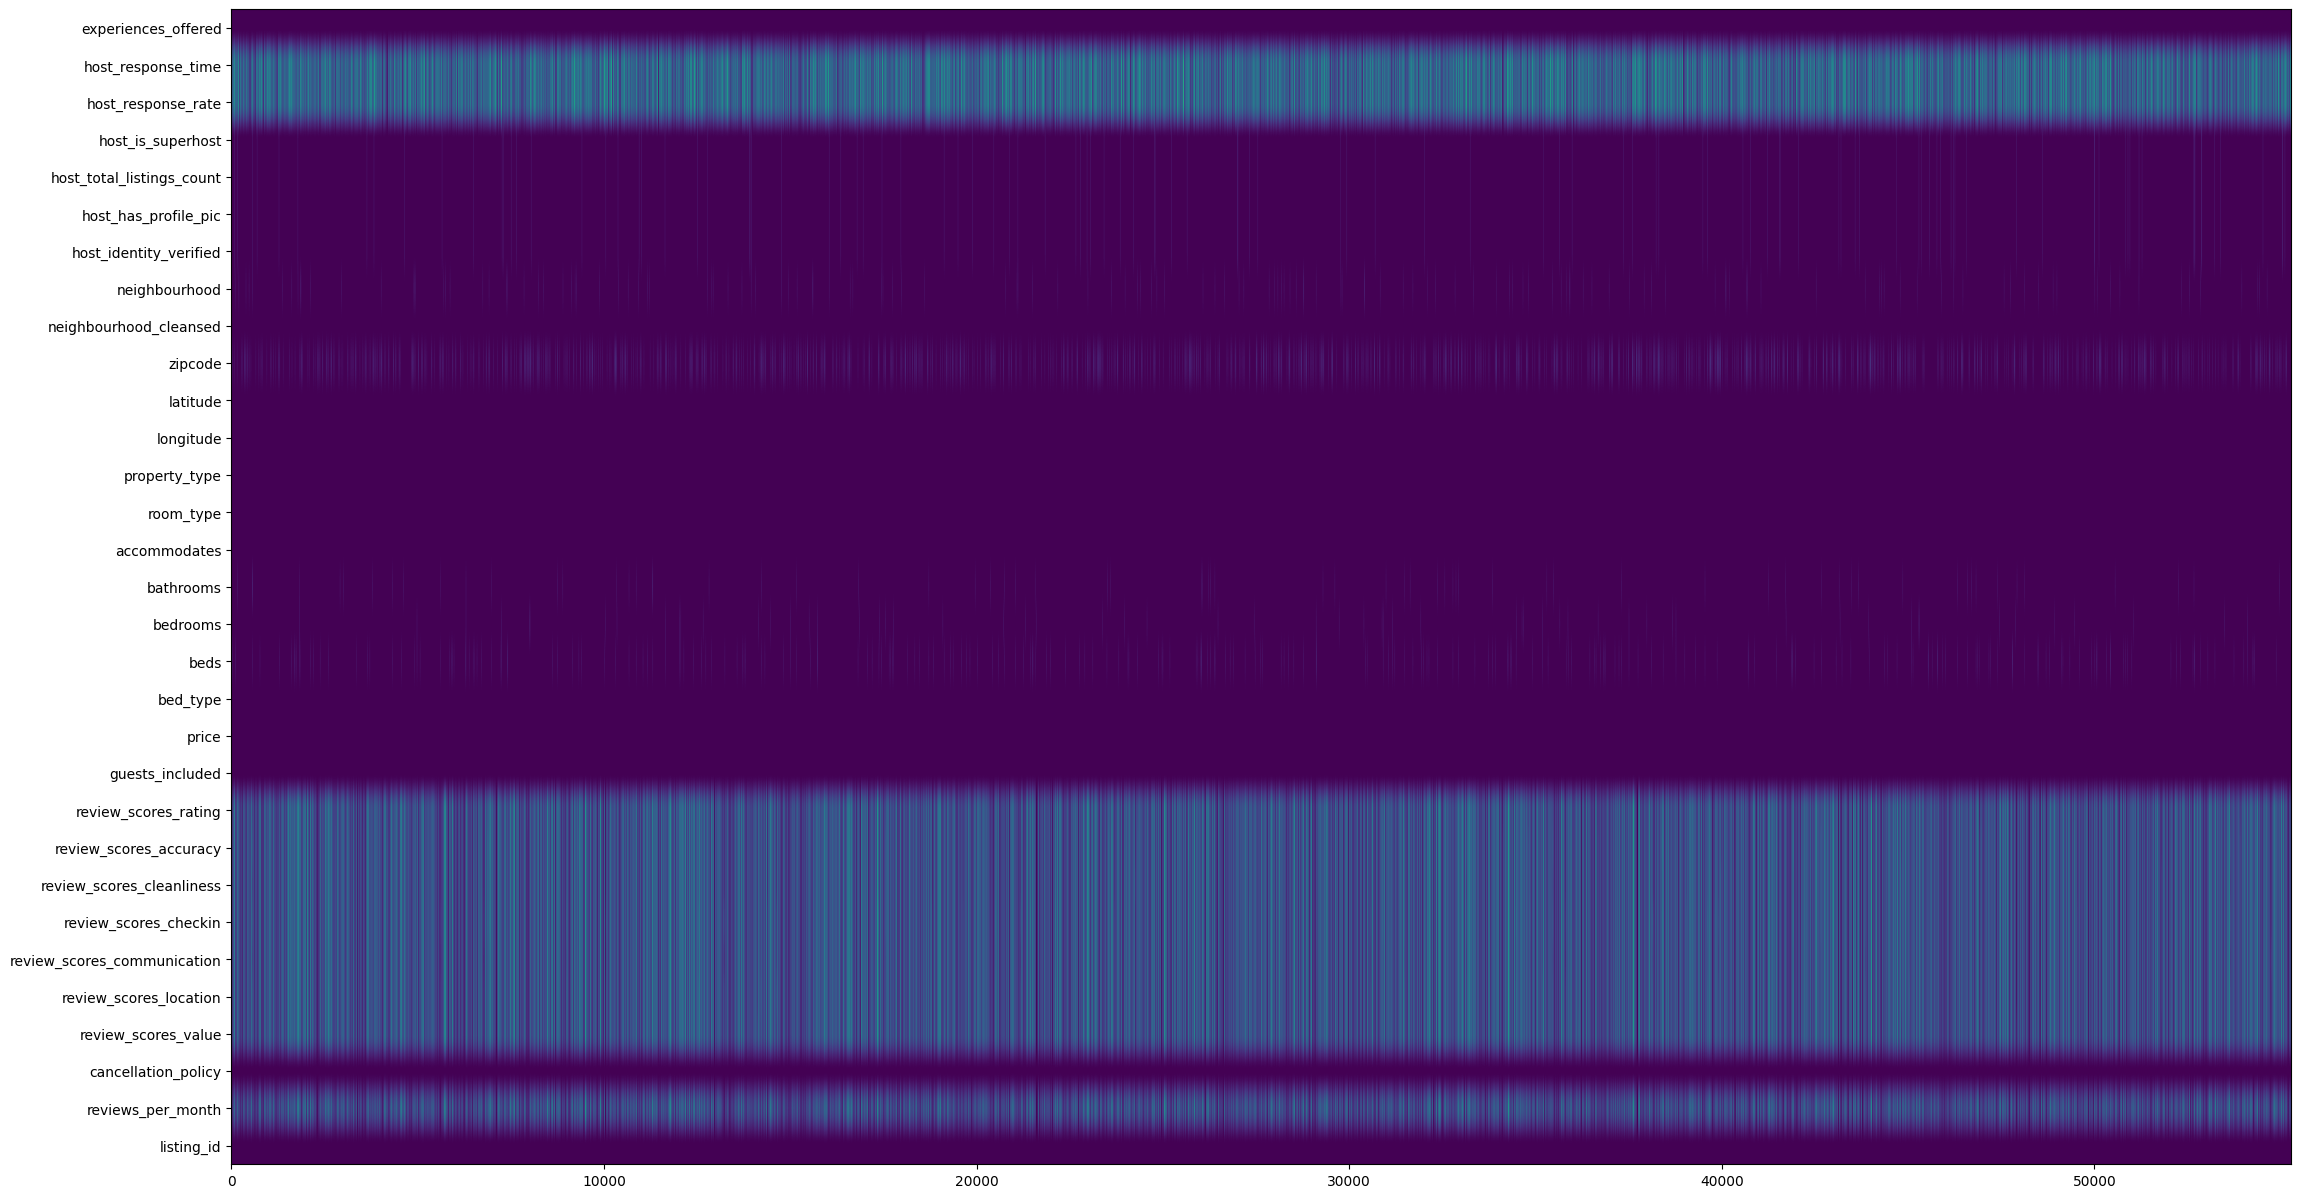

In [ ]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(tabla.isna().values.T)
ax.set_aspect(1000)
plt.yticks(range(tabla.shape[1]), tabla.columns);

**Observaciones:**
- "host_response_rate" y "host_response_time" son las variables que presentan la mayor cantidad de datos faltantes, con un porcentaje de 32.2% cada una.
- Las variables de reviews son las siguientes con mayor cantidad de nulos, cada una con un porcentaje cercano al 24% de datos faltantes.
- Se deben tener en cuenta estos valores para realizar el tratamiento de datos más adelante.